In [1]:
import numpy as np
import pandas as pd
from pylab import plt,mpl

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'

In [3]:
%matplotlib inline

In [4]:
data=pd.read_csv('tr_eikon_eod_data.csv',index_col=0,parse_dates=True)

In [6]:
data.head(10)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.880,133.900,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.870,134.690,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.800,132.250,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.600,130.000,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.830,133.520,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-11,30.015684,30.270,20.950,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.60,50.17,112.85
2010-01-12,29.674256,30.070,20.608,127.350,167.82,113.66,1136.22,18.25,1.4494,1127.30,48.35,110.49
2010-01-13,30.092827,30.350,20.960,129.110,169.07,114.62,1145.68,17.85,1.4510,1138.40,48.86,111.54


In [7]:
data=pd.DataFrame(data['.SPX'])

In [8]:
data.dropna(inplace=True)

In [11]:
data['rtes']=np.log(data/data.shift(1))

In [12]:
data['vol']=data['rtes'].rolling(252).std()*np.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB9FF26C88>,
      dtype=object)

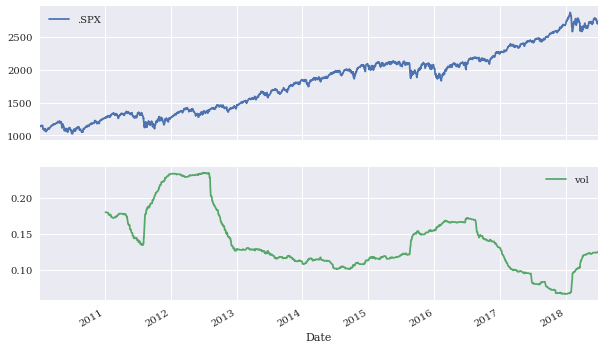

In [14]:
data[['.SPX', 'vol']].plot(subplots=True, figsize=(10, 6))

In [15]:
import math

In [17]:
loops=2500000
a=range(1,loops)
def f(x):
    return 3*math.log(x)+math.cos(x)**2
%timeit r=[f(x) for x in a]

1.9 s ± 49.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
import numpy as np
a=np.arange(1,loops)
%timeit r=3*np.log(a)+np.cos(a)**2

104 ms ± 2.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
import numexpr as ne

In [21]:
ne.set_num_threads(1)
f='3*log(a)+cos(a)**2'
%timeit r=ne.evaluate(f)

49.6 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
ne.set_num_threads(8)
%timeit r=ne.evaluate(f)

27.3 ms ± 666 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [1]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [2]:
print(timeseries.head())

   id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BAF091D400>,
      dtype=object)

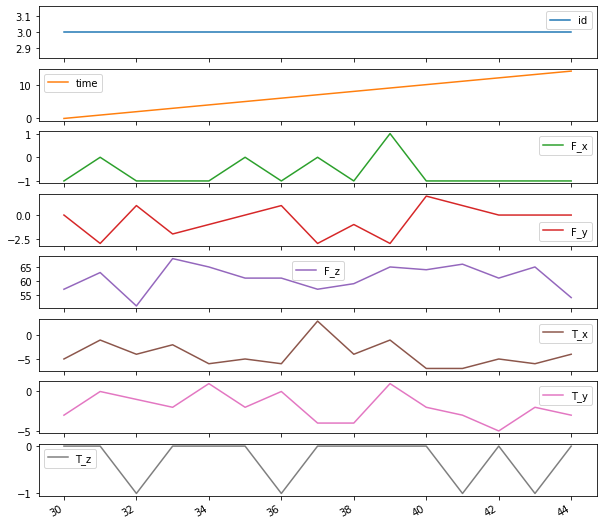

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))


In [7]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:26<00:00,  2.69s/it]


In [8]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [9]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:29<00:00,  2.97s/it]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [12]:
features_filtered_direct.dropna(inplace=True)

In [45]:
y.value_counts()

0    67
1    21
dtype: int64

In [52]:
param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = 'binary_logloss'

In [34]:
import numpy as np

from sklearn.model_selection import train_test_split


In [53]:
X_train, X_test, y_train, y_test=train_test_split(features_filtered_direct,y, test_size=0.33, random_state=42)

In [54]:
lgb_train=lgb.Dataset(X_train,y_train)
lgb_eval=lgb.Dataset(X_test,y_test,reference=lgb_train)

In [23]:
import lightgbm as lgb

In [58]:
gbm=lgb.train(param,train_set=lgb_train,num_boost_round=600,
             valid_sets=lgb_eval,early_stopping_rounds=5)

[1]	valid_0's binary_logloss: 0.577892
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.519869
[3]	valid_0's binary_logloss: 0.471629
[4]	valid_0's binary_logloss: 0.437531
[5]	valid_0's binary_logloss: 0.406758
[6]	valid_0's binary_logloss: 0.387573
[7]	valid_0's binary_logloss: 0.367239
[8]	valid_0's binary_logloss: 0.342343
[9]	valid_0's binary_logloss: 0.323002
[10]	valid_0's binary_logloss: 0.303233
[11]	valid_0's binary_logloss: 0.286842
[12]	valid_0's binary_logloss: 0.268257
[13]	valid_0's binary_logloss: 0.255278
[14]	valid_0's binary_logloss: 0.243832
[15]	valid_0's binary_logloss: 0.228896
[16]	valid_0's binary_logloss: 0.219226
[17]	valid_0's binary_logloss: 0.210714
[18]	valid_0's binary_logloss: 0.202578
[19]	valid_0's binary_logloss: 0.194473
[20]	valid_0's binary_logloss: 0.186932
[21]	valid_0's binary_logloss: 0.178689
[22]	valid_0's binary_logloss: 0.172548
[23]	valid_0's binary_logloss: 0.162935
[24]	valid_0's binary_loglos

In [59]:
ygbm=gbm.predict(features_filtered_direct)

In [61]:
ygbm=np.array(ygbm)

In [64]:
results=np.where(ygbm>=0.5,1,0)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy=accuracy_score(results,y)

In [68]:
accuracy

1.0

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, results)
cm

array([[67,  0],
       [ 0, 21]], dtype=int64)

In [2]:
from sn_random_numbers import *

NameError: name 'null' is not defined

In [ ]:
import sn